In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "C:\\Users\\User\\Desktop\\with_DM_cases.csv"

In [3]:
df = pd.read_csv(PATH, encoding = 'big5')

In [4]:
df = df.rename(columns={'Unnamed: 0': 'name'})

In [5]:
df.head(4)

,name,No,total,lacune,microbleeds,PVS,WMH,frontal_mean,Parietal_mean,WM_mean,CH_mean,BG_mean,TH_mean,GM_mean,total_mean
0,王明錦,16976407,3,1,2,10,3,0.013949,0.017570,0.015760,0.033537,0.031380,0.011507,0.025475,0.020617
1,林東龍,126690,4,5,15,3,3,0.000937,0.001337,0.001137,0.000927,0.006990,0.000860,0.002926,0.002031
2,黃范勤金,17085009,3,0,15,4,3,0.032223,0.102379,0.055608,0.049664,0.067837,0.018161,0.045221,0.050414
3,黃龍山,15060036,3,3,3,5,3,0.004575,0.096088,0.050331,0.036669,0.075415,0.027230,0.046438,0.048385


In [6]:
data = df.values[:,2:]

In [7]:
lacune = np.unique(df.lacune.values)
microbleeds = np.unique(df.microbleeds.values)
PVS = np.unique(df.PVS.values)
WMH = np.unique(df.WMH.values)
total = np.unique(df.total.values)

In [8]:
Ki_location = ["frontal_mean","Parietal_mean","WM_mean","CH_mean","BG_mean","TH_mean","GM_mean","total_mean"]

In [9]:
total[0:1]

array([0], dtype=int64)

In [10]:
pid = df.name.values

In [11]:
result_mean = []
result_std = []
criteria_list = []
separte_list = []
separte_pid = []
for total_score in total[0:1]:
    for lacune_num in lacune:
        for micro_num in microbleeds:
            for PVS_num in PVS:
                for WMH_num in WMH:
                    criteria_list.append([total_score, lacune_num, micro_num, PVS_num, WMH_num])
                    criteria = (data[:,0]>=total_score) & (data[:,1]>=lacune_num) & (data[:,2]>=micro_num) & (data[:,3]>=PVS_num) & (data[:,4]>=WMH_num)
                    class1 = np.array(data[criteria][:,5:],dtype=np.float64)
                    class2 =  np.array(data[criteria == False][:,5:],dtype=np.float64)
                    
                    class1_mean = np.mean(class1, axis=0)
                    class1_std = np.std(class1, axis=0)
                    class2_mean = np.mean(class2, axis=0)
                    class2_std = np.std(class2, axis=0)
                    
                    result_mean.append([class1_mean, class2_mean])
                    result_std.append([class1_std, class2_std])
                    separte_list.append([class1, class2])
                    separte_pid.append([pid[criteria], pid[criteria==False]])

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
D:\Anaconda\lib\site-packages\numpy\core\_methods.py:207: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [12]:
for result in range(8):
    if (len(separte_list[0][0])==0) or (len(separte_list[0][1])==0):
        continue
    else:
#         print(separte_list[0][0])
        gp1 = separte_list[0][0][:,result]
        gp2 = separte_list[0][1][:,result]
    
        
        plt.boxplot([gp1, gp2], labels=("class 1", "class 2"))
#     plt.boxplot(gp2, labels="class 2")
        plt.subtitle("criteria = ")
        plt.show()

In [13]:
length = []
for i in separte_list:
    length.append(len(i[0]))

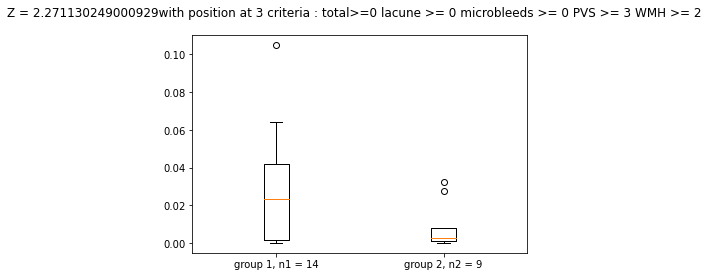

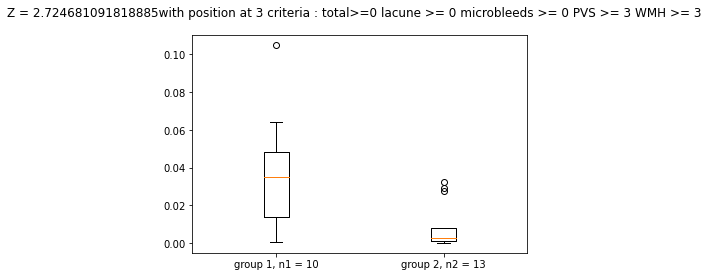

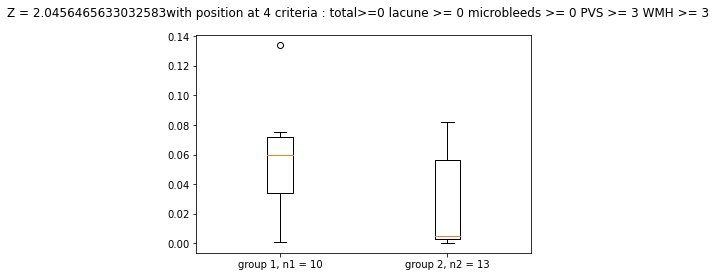

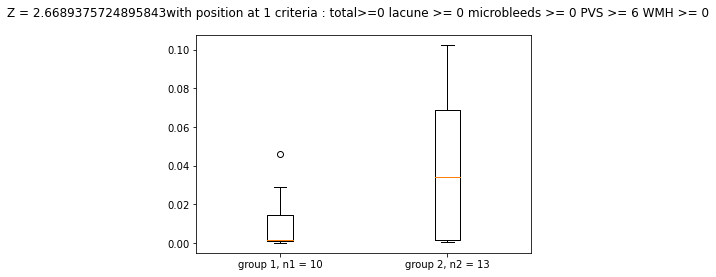

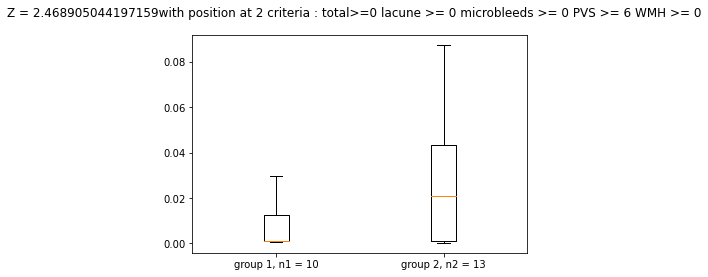

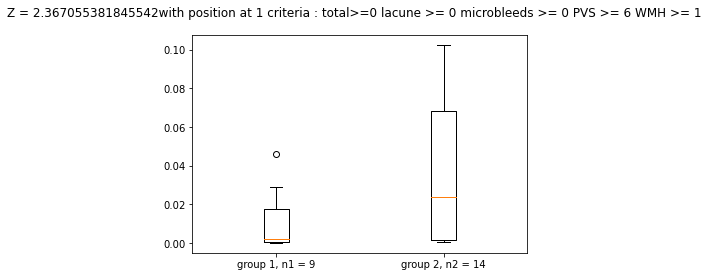

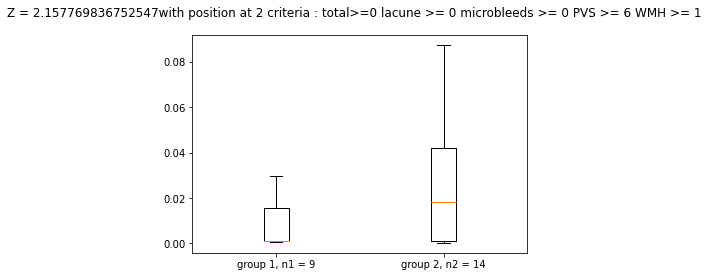

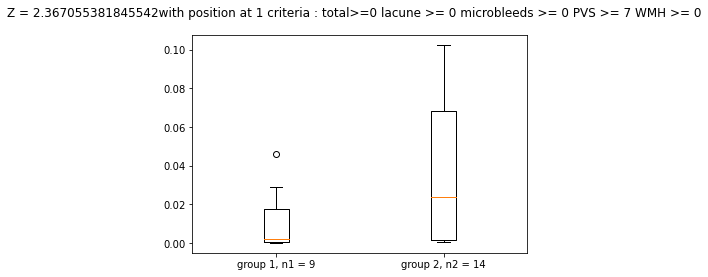

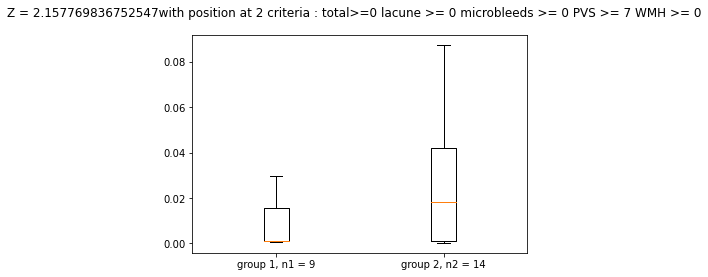

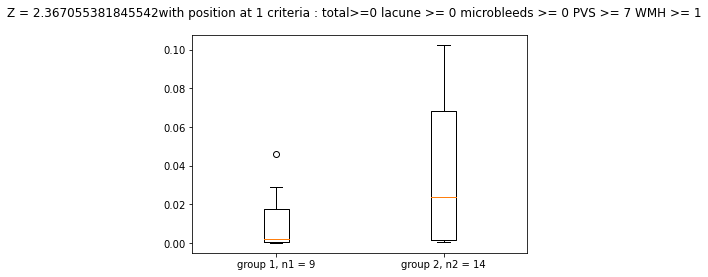

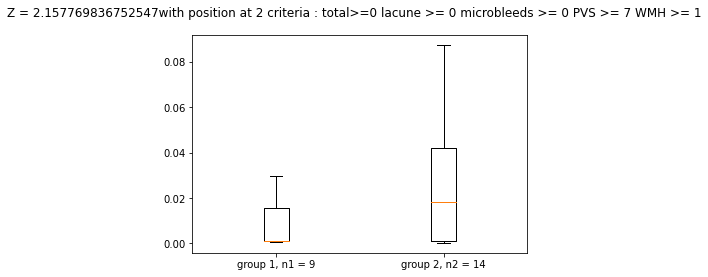

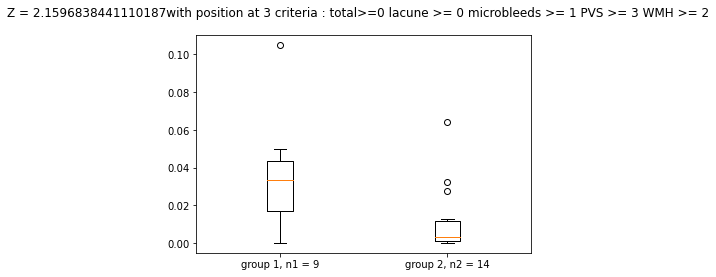

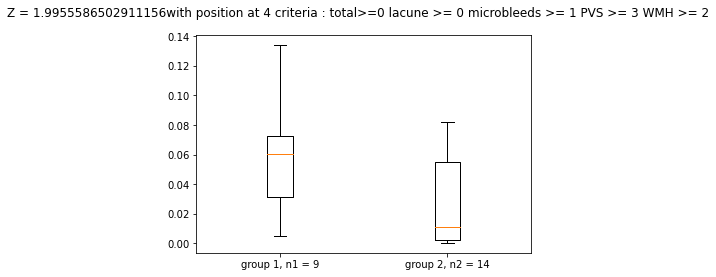

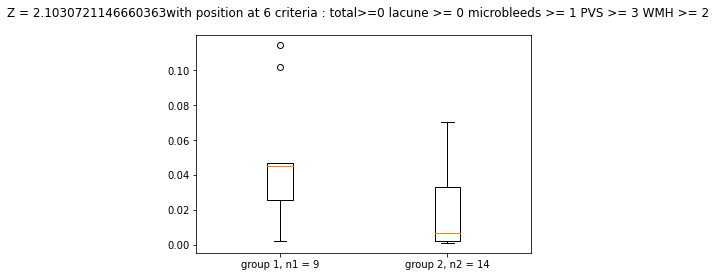

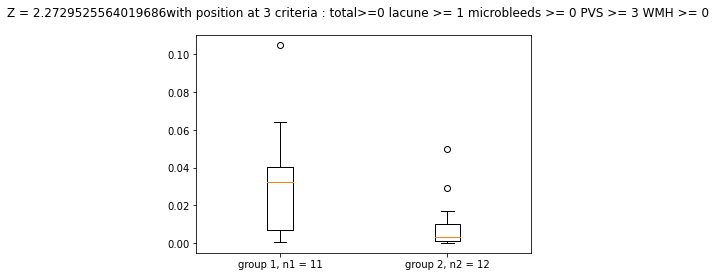

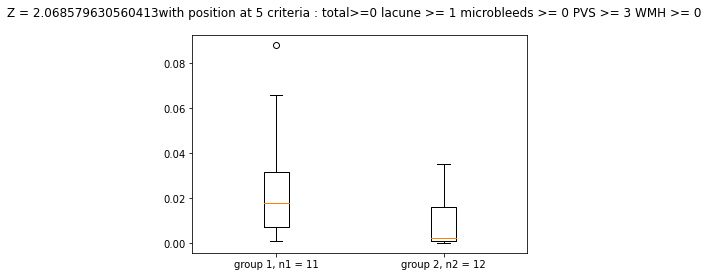

In [14]:
significant_array = []
significant_pid = []
for cri in range(len(criteria_list)):
    for Ki_loc in range(8):
        gp1 = separte_list[cri][0][:,Ki_loc]
        gp2 = separte_list[cri][1][:,Ki_loc]
        if (len(gp1)>8) & (len(gp2)>5):
#             print(separte_list[cri])00
            Z = abs(result_mean[cri][0][Ki_loc]-result_mean[cri][1][Ki_loc])/np.sqrt(result_std[cri][0][Ki_loc]**2/len(separte_list[cri][0][:,Ki_loc])+result_std[cri][1][Ki_loc]**2/len(separte_list[cri][1][:,Ki_loc]))
            if Z>1.96:
                significant_array.append([Z, Ki_location[Ki_loc], 
                              criteria_list[cri][0],
                              criteria_list[cri][1],
                              criteria_list[cri][2],
                              criteria_list[cri][3],
                              criteria_list[cri][4]])
                significant_pid.append(separte_pid[cri])
                label_1 = "group 1, n1 = "+str(len(gp1))
                label_2 = "group 2, n2 = "+str(len(gp2))
                plt.boxplot([gp1, gp2], labels=(label_1, label_2))
                plt.suptitle("Z = "+str(Z)+ "with position at "+str(Ki_loc)+ " criteria : total>="+str(criteria_list[cri][0])+" lacune >= "+str(criteria_list[cri][1])+" microbleeds >= "+str(criteria_list[cri][2])+" PVS >= "+str(criteria_list[cri][3])+" WMH >= "+str(criteria_list[cri][4]))
                plt.show()
                

In [15]:
df_signif = pd.DataFrame(significant_array, columns = ['Z values', 'position', "total","lacune","microbleeds","PVS","WMH"])
df_pid = pd.DataFrame(significant_pid, columns = ["Group 1", "Group2"])

In [16]:
df_signif

,Z values,position,total,lacune,microbleeds,PVS,WMH
0,2.271130,CH_mean,0,0,0,3,2
1,2.724681,CH_mean,0,0,0,3,3
2,2.045647,BG_mean,0,0,0,3,3
3,2.668938,Parietal_mean,0,0,0,6,0
4,2.468905,WM_mean,0,0,0,6,0
5,2.367055,Parietal_mean,0,0,0,6,1
6,2.157770,WM_mean,0,0,0,6,1
7,2.367055,Parietal_mean,0,0,0,7,0
8,2.157770,WM_mean,0,0,0,7,0
9,2.367055,Parietal_mean,0,0,0,7,1


In [17]:
# df_signif.to_csv('C:\\Users\\User\\Desktop\\with DM significance.csv')
# df_pid.to_csv('C:\\Users\\User\\Desktop\\with DM significance reference pid.csv', encoding = 'big5')


## Total v.s CH 

In [18]:
total_means = df.total_mean.values
CH_means = df.CH_mean.values

In [19]:
import statsmodels.api as sm

In [20]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [21]:
model = sm.OLS( total_means.reshape(-1, 1), sm.add_constant(CH_means.reshape(-1, 1))) #(y,X)

In [22]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     53.30
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           3.45e-07
Time:                        23:00:44   Log-Likelihood:                 67.041
No. Observations:                  23   AIC:                            -130.1
Df Residuals:                      21   BIC:                            -127.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0070      0.004      1.913      0.0

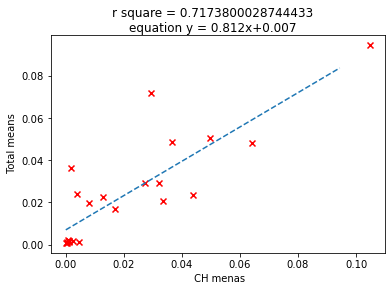

In [23]:
plt.scatter(CH_means,total_means, marker = 'x', color = 'r')
plt.xlabel(" CH menas")
plt.ylabel(" Total means")
plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

# plt.suptitle('rr')
X = np.linspace(0, max(total_means),50)
plt.plot(X, results.params[0]+results.params[1]*X, '--')
plt.savefig(' DM CH total.png')
plt.show()

## GM vs 

In [24]:
WM = [df.frontal_mean.values,df.Parietal_mean.values]
GM = [df.CH_mean.values,df.BG_mean.values,df.TH_mean.values]

In [25]:
WM_index = ['frontal mean', 'parietal mean']
GM_index = ['CH mean', 'BG mean', 'TH mean']

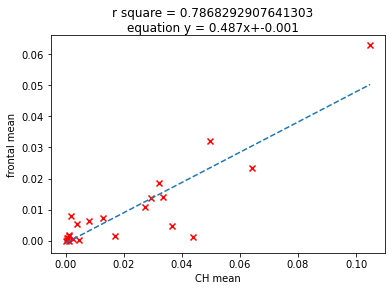

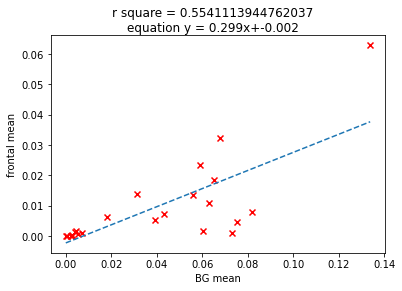

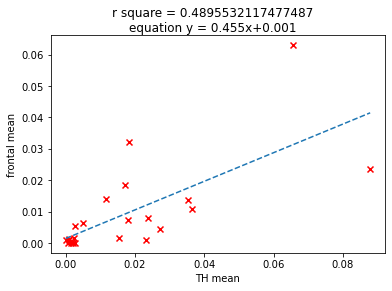

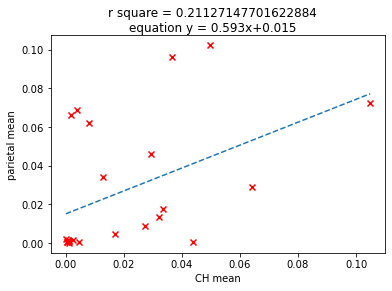

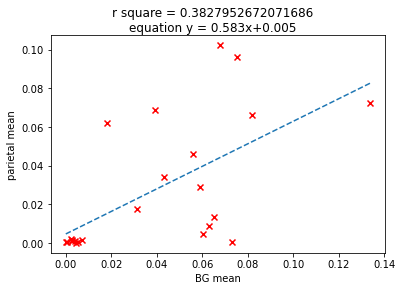

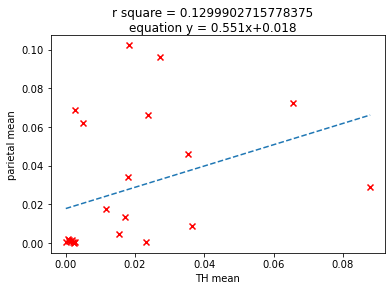

In [26]:
count = 0
for WM_idx in range(len(WM)):
    for GM_idx in range(len(GM)):
        model = sm.OLS( WM[WM_idx].reshape(-1, 1), sm.add_constant(GM[GM_idx].reshape(-1, 1))) #(y,X)
        results = model.fit()
        plt.scatter(GM[GM_idx],WM[WM_idx], marker = 'x', color = 'r')
        plt.xlabel(GM_index[GM_idx])
        plt.ylabel(WM_index[WM_idx])
        plt.suptitle('r square = '+str(results.rsquared))
        plt.suptitle('r square = '+str(results.rsquared)+'\n'+'equation y = '+str(round(results.params[1],3))+'x+'+str(round(results.params[0],3)))

        X = np.linspace(0, max(GM[GM_idx]),50)
        plt.plot(X, results.params[0]+results.params[1]*X, '--')
        if results.rsquared > 0.7:
            plt.savefig("DM GM WM coorelation fig "+str(count)+'.png')
            count+=1
        plt.show()

In [27]:
DM_with_CSVD = data[:12][:,5::]
DM_without_CSVD = data[12::][:,5::]

In [28]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='black')


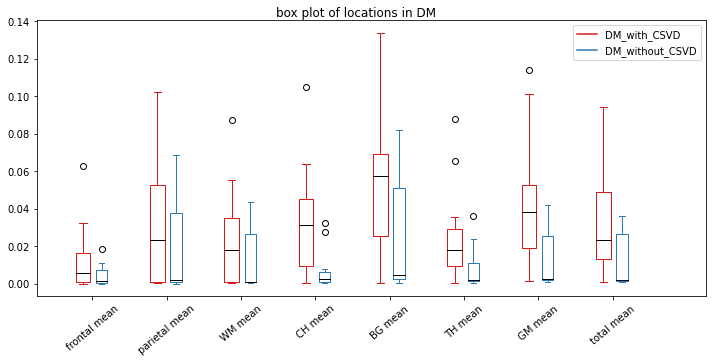

In [29]:
plt.figure(figsize=(10,5))
bpl = plt.boxplot(DM_with_CSVD, positions=[3+4*i-.5 for i in range(8)],  widths = 0.8)
bp2 = plt.boxplot(DM_without_CSVD,positions = [3+4*i+.5 for i in range(8)],  widths = 0.6)
plt.xticks([3+4*i for i in range(8)], ['frontal mean', 'parietal mean', 'WM mean','CH mean', 'BG mean', 'TH mean', 'GM mean', 'total mean'], rotation = 40)
# plt.xticks(['frontal mean', 'parietal mean', 'WM mean','CH mean', 'BG mean', 'TH mean', 'GM mean', 'total mean'])
plt.xlim(0,36)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bp2, '#2C7BB6')
plt.plot([], c='#D7191C', label='DM_with_CSVD')
plt.plot([], c='#2C7BB6', label='DM_without_CSVD')
plt.suptitle('box plot of locations in DM', y=1)
plt.tight_layout()
plt.legend()
plt.savefig('DM box plot.png', dpi = 500)

plt.show()

In [30]:
for i in range(8):
    Z = abs(np.mean(DM_with_CSVD[:,i])-np.mean(DM_without_CSVD[:,i]))/np.sqrt((np.std(DM_with_CSVD[:,i])**2)/len(DM_with_CSVD[:,i])+(np.std(DM_without_CSVD[:,i])**2)/len(DM_without_CSVD[:,i]))
    print(Z)

1.6204867925486564
0.990425191747407
1.1895821625021459
2.7662455040625304
1.8552232010836809
2.0971477279055466
2.5368745708727705
2.1883179392972245
